In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap

C:\Users\Uday dasari\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
price_increse_analysis=pd.read_csv(r'C:\Users\DasariUday\Desktop\ds-mini-project\raw\price_increse_analysis.csv')
price_increse_analysis.head()

,Unnamed: 0,Contact_ID,Source_Folder,Q1_Topic_Introduced_By,Q2_Price_Increase_Introduction,Q3_Renewal_Fee_Mentioned,Q4_Percentage_Price_Increase_Mentioned,Q5_Monetary_Price_Increase_Mentioned,Q6_Price_Range_Mentioned,Q7_Customer_Asked_For_Justification,Q10_Customer_Response,Q11_Desire_To_Cancel,Q12_Discount_Offered,Q14_Agent_Response_To_Cancel,Previous_Year_Price,Current_Year_Price
0,0,537988364615,02_09_2024,Not Discussed,Not Discussed,No,No,No,Not Discussed,No,Neutral,Not Discussed,No,Not Discussed,Not Applicable,Not Applicable
1,1,537988367170,02_09_2024,Agent,The agent mentioned the upcoming renewal and t...,No,No,No,Not Discussed,No,Positive,Renewed,No,Not Discussed,Not Applicable,Not Applicable
2,2,537988370256,02_09_2024,Not Discussed,Not Discussed,No,No,No,Not Discussed,No,Neutral,Not Discussed,No,Not Discussed,Not Applicable,Not Applicable
3,3,537988474219,02_09_2024,Not Discussed,Not Discussed,No,No,No,Not Discussed,No,Neutral,Not Discussed,No,Not Discussed,Not Applicable,Not Applicable
4,4,538174552516,02_09_2024,Agent,The price increase was introduced as part of t...,"Yes, £845",No,Yes,£695 to £845,Yes,Neutral,Renewed,No,Not Discussed,£695,£845


In [17]:
transcript=pd.read_csv(r'C:\Users\DasariUday\Desktop\ds-mini-project\raw\transcript.csv')
transcript.head()

,Unnamed: 0,Contact_ID,Start_Date,Prospect Outcome,Prospect Status,Prospect Renewal Date,Renewal Month,Payment Method,Renewal Score at release,Proforma Membership Status,...,Band,Date Paid,Payment Timeframe,Payment Time Frame 2,Payment Time Frame 3,Total Net Paid,Starting Net,Auto Renewal - Proforma Release,Now on Auto Renewal,Process
0,0,538175801914,2024-09-03,Won,Renewed,2024-10-23,2024-10-01,BACS,27.0,Accredited,...,Band D,2024-10-28 00:00:00.000,5.0,Within 13 Days After Renewal,Paid Late,1279.0,1279,0,0,process
1,1,538176256176,2024-09-04,Won,Renewed,2024-10-01,2024-10-01,CARD,25.5,Accredited,...,Band C2,2024-10-01 04:00:35.710,0.0,On Renewal Date,Paid on Time,1099.0,1099,1,1,process
2,2,538176270449,2024-09-04,Won,Renewed,2024-10-01,2024-10-01,CARD,23.5,Accredited,...,Band C1,2024-10-01 04:00:27.953,0.0,On Renewal Date,Paid on Time,799.0,799,1,1,process
3,3,538176276504,2024-09-04,Won,Renewed,2024-10-01,2024-10-01,CARD,26.0,Accredited,...,Band C1,2024-10-01 04:00:27.057,0.0,On Renewal Date,Paid on Time,799.0,799,1,1,process
4,4,538176294696,2024-09-04,Lost,No Longer Trading,2024-10-01,2024-10-01,NaN,25.0,In Progress,...,Band C2,NaN,NaN,NaN,NaN,NaN,949,1,0,process


In [18]:
competitor_analysis=pd.read_csv(r'C:\Users\DasariUday\Desktop\ds-mini-project\raw\competitor_analysis.csv')
competitor_analysis.head()

,Unnamed: 0,Contact_ID,Source_Folder,Explicit_Competitor_Mention,Implied_Competitor_Mention,Explicit_Switching_Intent,Implied_Switching_Intent,Competitor_Names_Listed,Mentioned_Alcumus_Competitors
0,0,537988364615,02_09_2024,No,No,No,No,COMP_NO,No
1,1,537988367170,02_09_2024,No,No,No,No,COMP_NO,No
2,2,537988370256,02_09_2024,No,No,No,No,COMP_NO,No
3,3,537988474219,02_09_2024,No,No,No,No,COMP_NO,No
4,4,538174552516,02_09_2024,No,No,No,No,COMP_NO,No


In [ ]:
# Merging datasets based on Contact_ID
merged_data = pd.merge(price_increse_analysis, transcript, on="Contact_ID", how="left")
data = pd.merge(merged_data, competitor_analysis, on="Contact_ID", how="left")
merged_data.head()
data.to_csv(r'C:\Users\DasariUday\Desktop\ds-mini-project\transformed_data\merged.csv', index=False)

In [21]:
data.columns

Index(['Unnamed: 0_x', 'Contact_ID', 'Source_Folder_x',
       'Q1_Topic_Introduced_By', 'Q2_Price_Increase_Introduction',
       'Q3_Renewal_Fee_Mentioned', 'Q4_Percentage_Price_Increase_Mentioned',
       'Q5_Monetary_Price_Increase_Mentioned', 'Q6_Price_Range_Mentioned',
       'Q7_Customer_Asked_For_Justification', 'Q10_Customer_Response',
       'Q11_Desire_To_Cancel', 'Q12_Discount_Offered',
       'Q14_Agent_Response_To_Cancel', 'Previous_Year_Price',
       'Current_Year_Price', 'Unnamed: 0_y', 'Start_Date', 'Prospect Outcome',
       'Prospect Status', 'Prospect Renewal Date', 'Renewal Month',
       'Payment Method', 'Renewal Score at release',
       'Proforma Membership Status', 'Anchor or Indie', 'Anchor Group',
       'Proforma Approved Lists', 'Tenure (Years)', 'Tenure Group', 'Band',
       'Date Paid', 'Payment Timeframe', 'Payment Time Frame 2',
       'Payment Time Frame 3', 'Total Net Paid', 'Starting Net',
       'Auto Renewal - Proforma Release', 'Now on Auto Rene

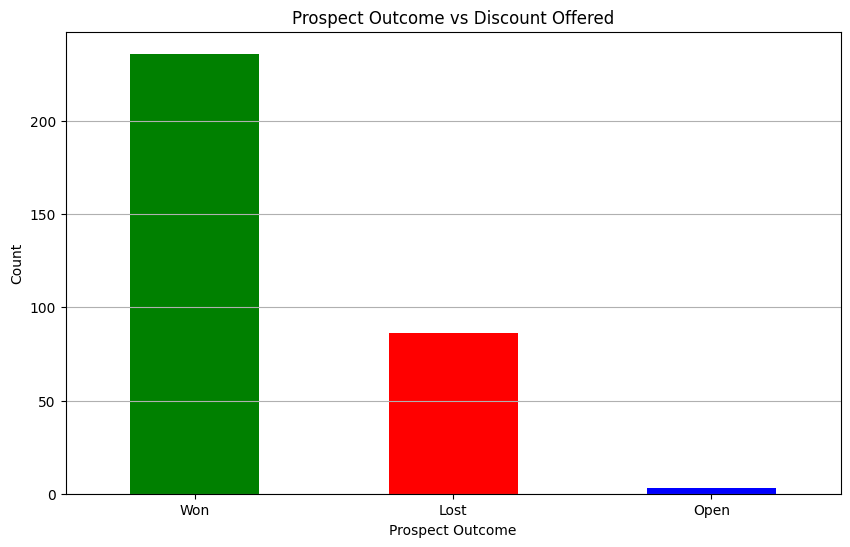

In [38]:
# Load the CSV data into a DataFrame
df = data

# Filter rows where discount was offered
discount_offered_df = df[df['Q12_Discount_Offered'] == 'Yes']

# Group by Prospect Outcome and count the occurrences
outcome_counts = discount_offered_df['Prospect Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
outcome_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Prospect Outcome vs Discount Offered')
plt.xlabel('Prospect Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Save the plot as an image file
plt.savefig('discount_vs_outcome.png')

# Show the plot
plt.show()



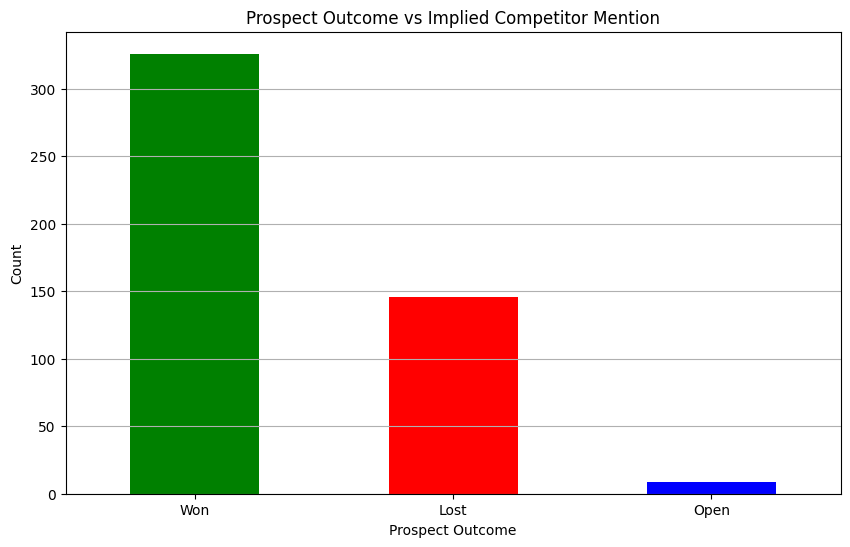

In [40]:
#hypothesis 2
# if customer is aware of the competitor or not

# Load the CSV data into a DataFrame
df = data

# Filter rows where Implied Competitor Mention is Yes
competitor_mention_df = df[df['Implied_Competitor_Mention'] == 'Yes']

# Group by Prospect Outcome and count the occurrences
outcome_counts = competitor_mention_df['Prospect Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
outcome_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Prospect Outcome vs Implied Competitor Mention')
plt.xlabel('Prospect Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Save the plot as an image file
plt.savefig('competitor_mention_vs_outcome.png')

# Show the plot
plt.show()



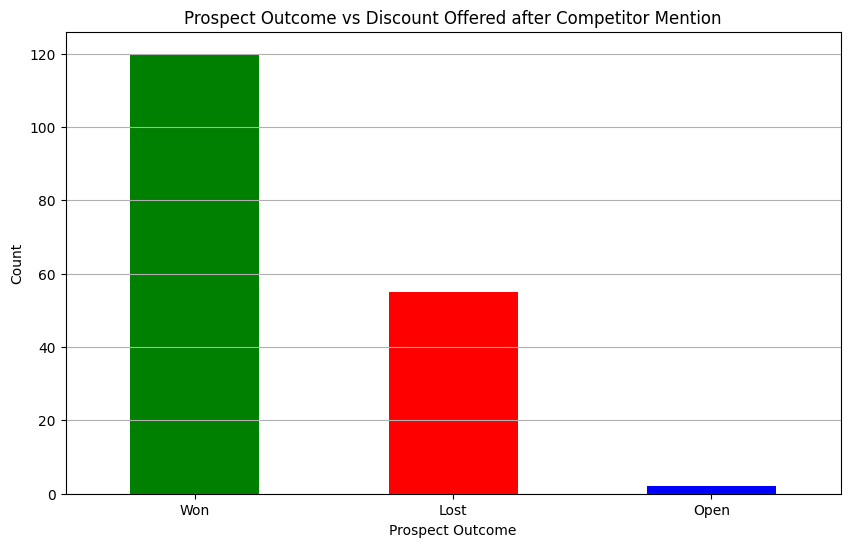

In [33]:
#hypothesis 3
# opering discount to customer after they mentioned about the competitor

# Load the CSV data into a DataFrame
df = data

# Filter rows where discount was offered and competitor was mentioned
discount_competitor_df = df[(df['Q12_Discount_Offered'] == 'Yes') & (df['Implied_Competitor_Mention'] == 'Yes')]

# Group by Prospect Outcome and count the occurrences
outcome_counts = discount_competitor_df['Prospect Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
outcome_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Prospect Outcome vs Discount Offered after Competitor Mention')
plt.xlabel('Prospect Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Save the plot as an image file
plt.savefig('discount_after_competitor_vs_outcome.png')

# Show the plot
plt.show()

C:\Users\DasariUday\AppData\Local\Temp\ipykernel_17500\2575814882.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')


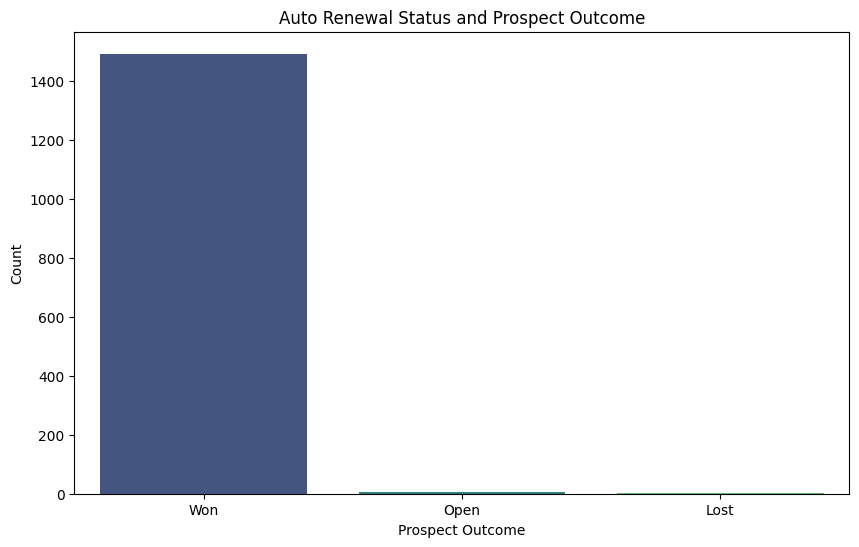

In [42]:
# Hypothesis 3: Auto Renewal Status and Prospect Outcome
auto_renewal_df = data[data['Now on Auto Renewal'] == 1]
outcome_counts = auto_renewal_df['Prospect Outcome'].value_counts()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')
plt.title('Auto Renewal Status and Prospect Outcome')
plt.xlabel('Prospect Outcome')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

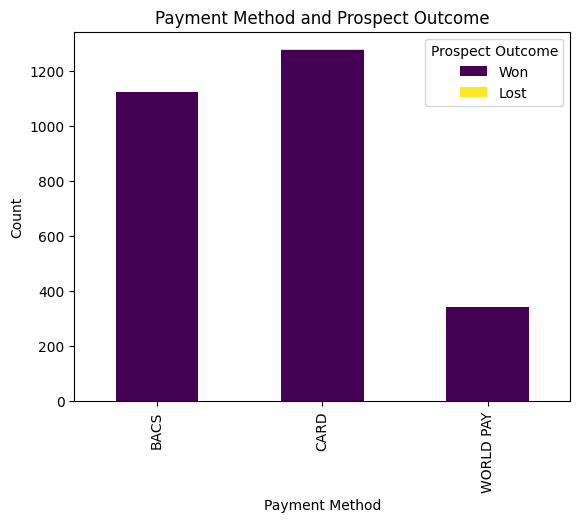

In [ ]:
# Hypothesis 4: Payment Method and Prospect Outcome
payment_method_df = data.groupby('Payment Method')['Prospect Outcome'].value_counts().unstack().fillna(0)

# Plotting the results
plt.figure(figsize=(12, 8))
payment_method_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Payment Method and Prospect Outcome')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()



## only one loss and that is using card

<Figure size 1200x800 with 0 Axes>

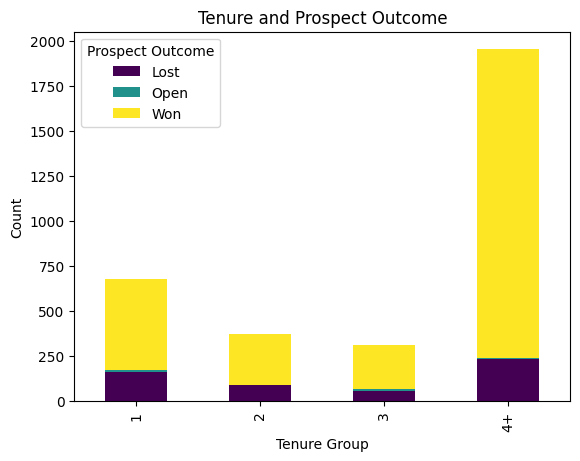

In [54]:
# Hypothesis 5: Tenure and Prospect Outcome
tenure_df = data.groupby('Tenure Group')['Prospect Outcome'].value_counts().unstack().fillna(0)

# Plotting the results
plt.figure(figsize=(12, 8))
tenure_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Tenure and Prospect Outcome')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.show()

In [48]:
#if Q1_Topic_Introduced_By is Agent check the prospect outcome won loss or open

C:\Users\DasariUday\AppData\Local\Temp\ipykernel_17500\407491576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')


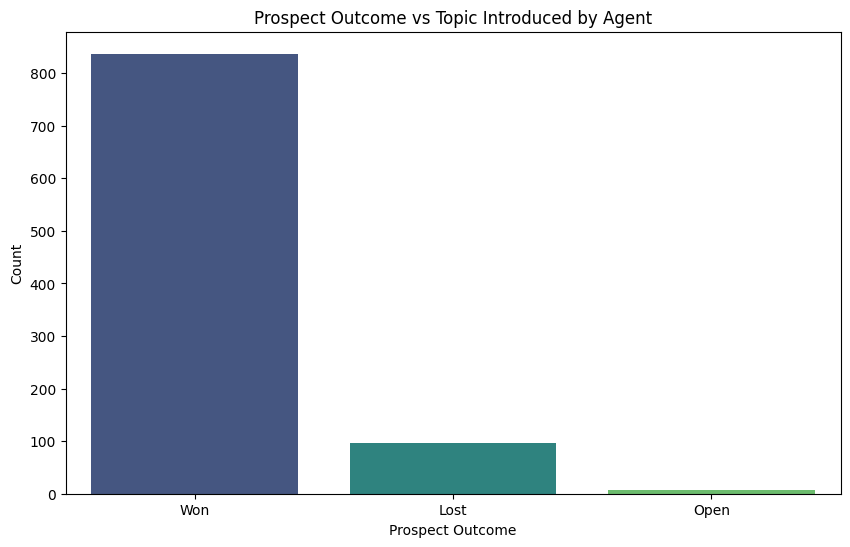

In [56]:


# Filter rows where Q1_Topic_Introduced_By is Agent
agent_introduced_df = data[data['Q1_Topic_Introduced_By'] == 'Agent']

# Group by Prospect Outcome and count the occurrences
outcome_counts = agent_introduced_df['Prospect Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')
plt.title('Prospect Outcome vs Topic Introduced by Agent')
plt.xlabel('Prospect Outcome')
plt.ylabel('Count')
plt.show()

In [4]:
df= pd.read_csv('merged.csv')
df_filtered = df[df["Prospect Outcome"].isin(["Won", "Lost"])]

# Separate "Open" cases as test data
df_test = df[df["Prospect Outcome"] == "Open"]

# Check class distribution
print(df_filtered["Prospect Outcome"].value_counts())
print("Test data shape:", df_test.shape)

Prospect Outcome
Won     2770
Lost     556
Name: count, dtype: int64
Test data shape: (29, 48)


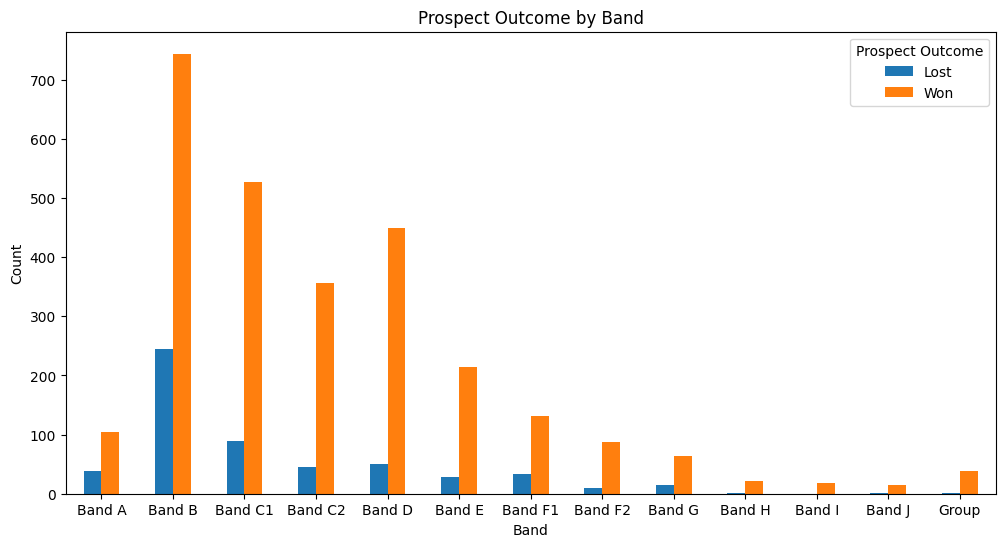

In [5]:
grouped_data = df_filtered.groupby(['Band', 'Prospect Outcome']).size().unstack()

# Plot the pie chart for 'Now on Auto Renewal'
grouped_data.plot(kind='bar', figsize=(12, 6))
plt.title('Prospect Outcome by Band')
plt.xlabel('Band')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Prospect Outcome')
plt.show()

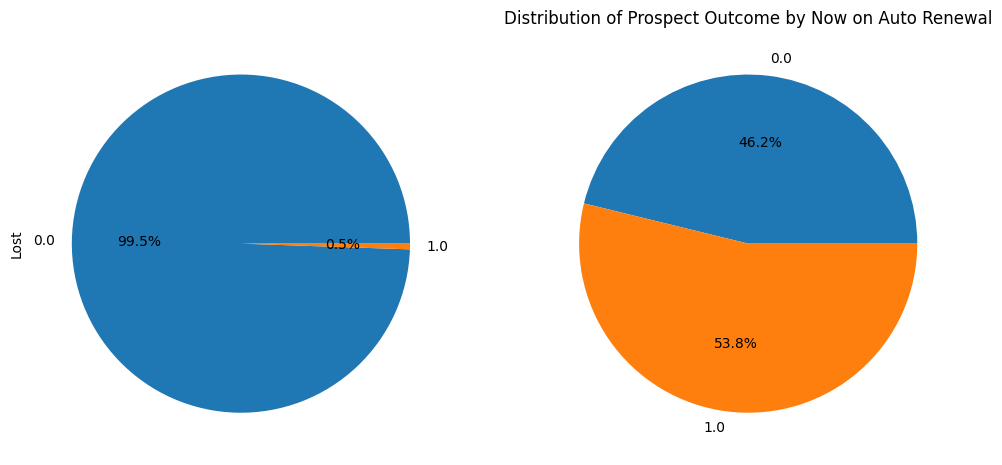

In [6]:
grouped_data =df_filtered.groupby(['Now on Auto Renewal', 'Prospect Outcome']).size().unstack()

# Plot the pie chart for 'Now on Auto Renewal'
grouped_data.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(12, 6), legend=False)
plt.title('Distribution of Prospect Outcome by Now on Auto Renewal')
plt.ylabel('')
plt.show()

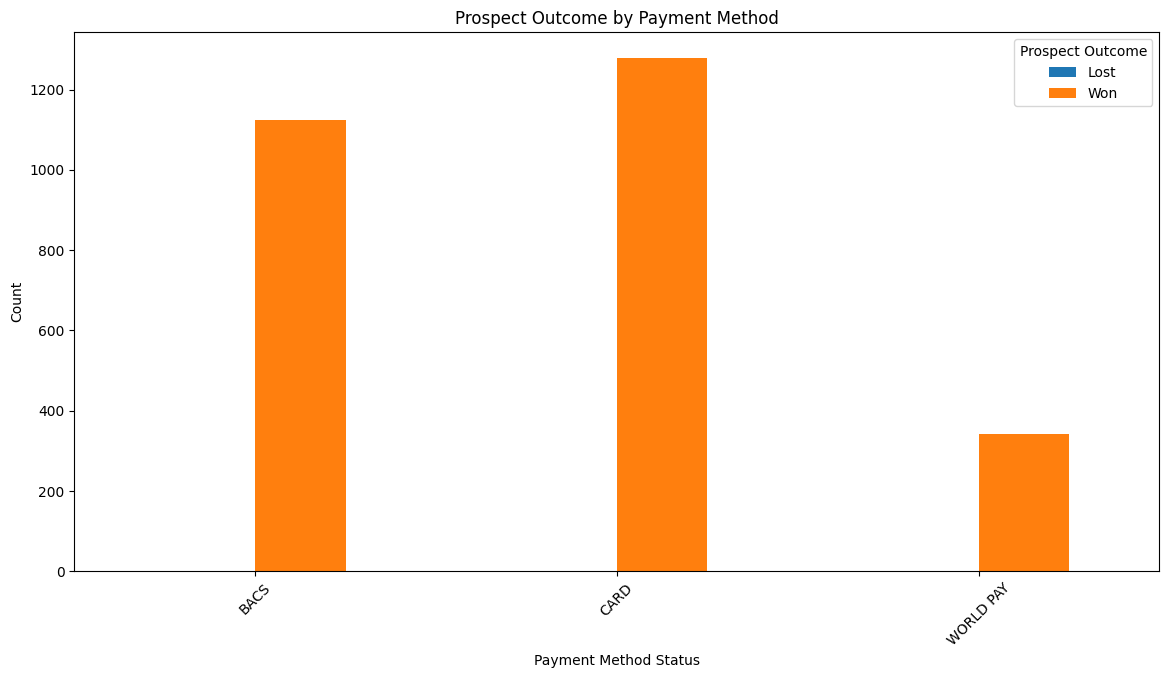

In [7]:
grouped_payment = df_filtered.groupby(['Payment Method', 'Prospect Outcome']).size().unstack()

# Plot the bar chart
grouped_payment.plot(kind='bar', figsize=(14, 7))
plt.title('Prospect Outcome by Payment Method')
plt.xlabel('Payment Method Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Prospect Outcome')
plt.show()

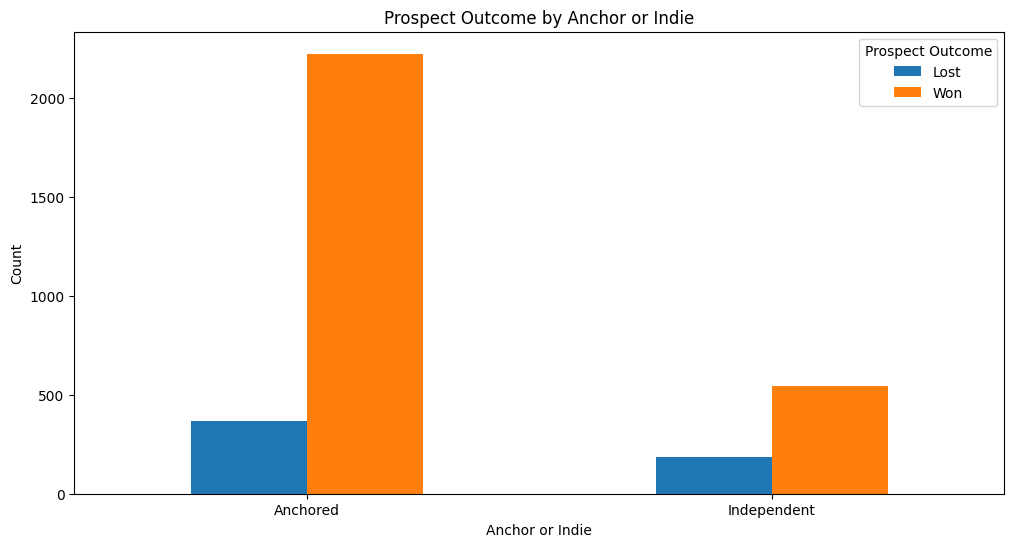

In [8]:
grouped_anchor_indie = df_filtered.groupby(['Anchor or Indie', 'Prospect Outcome']).size().unstack()

# Plot the bar chart
grouped_anchor_indie.plot(kind='bar', figsize=(12, 6))
plt.title('Prospect Outcome by Anchor or Indie')
plt.xlabel('Anchor or Indie')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Prospect Outcome')

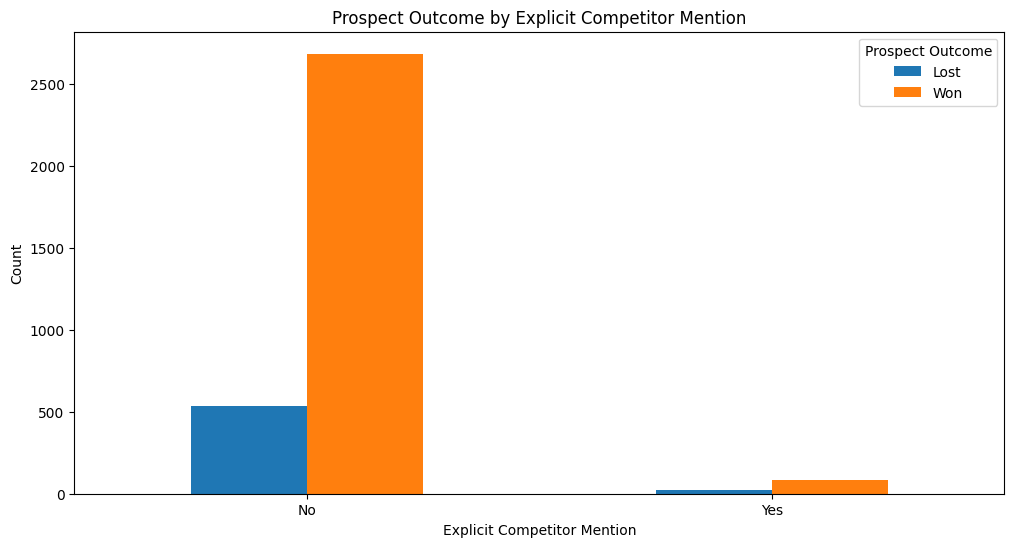

In [9]:

grouped_competitor_outcome = df_filtered.groupby(['Explicit_Competitor_Mention', 'Prospect Outcome']).size().unstack()

# Plot the bar chart
grouped_competitor_outcome.plot(kind='bar', figsize=(12, 6))
plt.title('Prospect Outcome by Explicit Competitor Mention')
plt.xlabel('Explicit Competitor Mention')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Prospect Outcome')
plt.show()


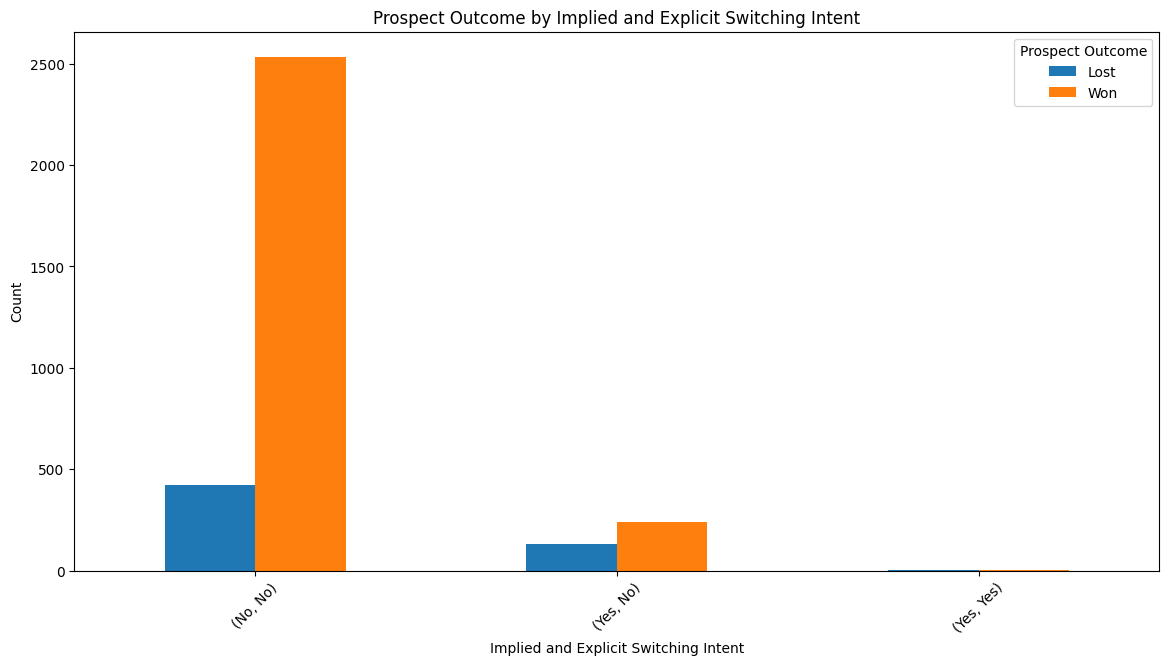

In [10]:
grouped_switching_intent = df_filtered.groupby(['Implied_Switching_Intent', 'Explicit_Switching_Intent', 'Prospect Outcome']).size().unstack()

# Plot the bar chart
grouped_switching_intent.plot(kind='bar', figsize=(14, 7))
plt.title('Prospect Outcome by Implied and Explicit Switching Intent')
plt.xlabel('Implied and Explicit Switching Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Prospect Outcome')
plt.show()

In [11]:
selected_features = [
    "Band", "Now on Auto Renewal", "Payment Method", 
    "Proforma Membership Status", "Anchor or Indie", 
    "Explicit_Competitor_Mention", "Explicit_Switching_Intent", 
    "Implied_Switching_Intent", "Prospect Outcome"
]

df_selected = df_filtered[selected_features]

# Check for missing values
df_selected.isnull().sum()

Band                             0
Now on Auto Renewal              0
Payment Method                 578
Proforma Membership Status       0
Anchor or Indie                  0
Explicit_Competitor_Mention      0
Explicit_Switching_Intent        0
Implied_Switching_Intent         0
Prospect Outcome                 0
dtype: int64

In [29]:
# Fill missing values in "Payment Method" with "Unknown"
df_selected["Payment Method"].fillna("Unknown", inplace=True)
df_test["Payment Method"].fillna("Unknown", inplace=True)
# Verify missing values are handled
print(df_selected.isnull().sum())


Band                           0
Now on Auto Renewal            0
Payment Method                 0
Proforma Membership Status     0
Anchor or Indie                0
Explicit_Competitor_Mention    0
Explicit_Switching_Intent      0
Implied_Switching_Intent       0
Prospect Outcome               0
dtype: int64


C:\Users\Uday dasari\AppData\Local\Temp\ipykernel_24144\3693133957.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected["Payment Method"].fillna("Unknown", inplace=True)
C:\Users\Uday dasari\AppData\Local\Temp\ipykernel_24144\3693133957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Payment Method"].fillna("Unknown

In [16]:
# Encode categorical variables
label_encoders = {}
for col in df_selected.columns:
    if df_selected[col].dtype == "object" and col != "Prospect Outcome":
        le = LabelEncoder()
        df_selected[col] = le.fit_transform(df_selected[col])
        label_encoders[col] = le

# Encode target variable
df_selected["Prospect Outcome"] = df_selected["Prospect Outcome"].map({"Won": 1, "Lost": 0})

df_selected.head()

C:\Users\Uday dasari\AppData\Local\Temp\ipykernel_24144\2711585284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = le.fit_transform(df_selected[col])
C:\Users\Uday dasari\AppData\Local\Temp\ipykernel_24144\2711585284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = le.fit_transform(df_selected[col])
C:\Users\Uday dasari\AppData\Local\Temp\ipykernel_24144\2711585284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Band,Now on Auto Renewal,Payment Method,Proforma Membership Status,Anchor or Indie,Explicit_Competitor_Mention,Explicit_Switching_Intent,Implied_Switching_Intent,Prospect Outcome
17,1,0.0,2,2,0,1,0,1,0
19,6,0.0,2,2,0,0,0,1,0
21,2,0.0,0,2,0,0,0,0,1
22,0,0.0,2,2,1,0,0,0,0
30,4,0.0,2,2,1,0,0,0,0


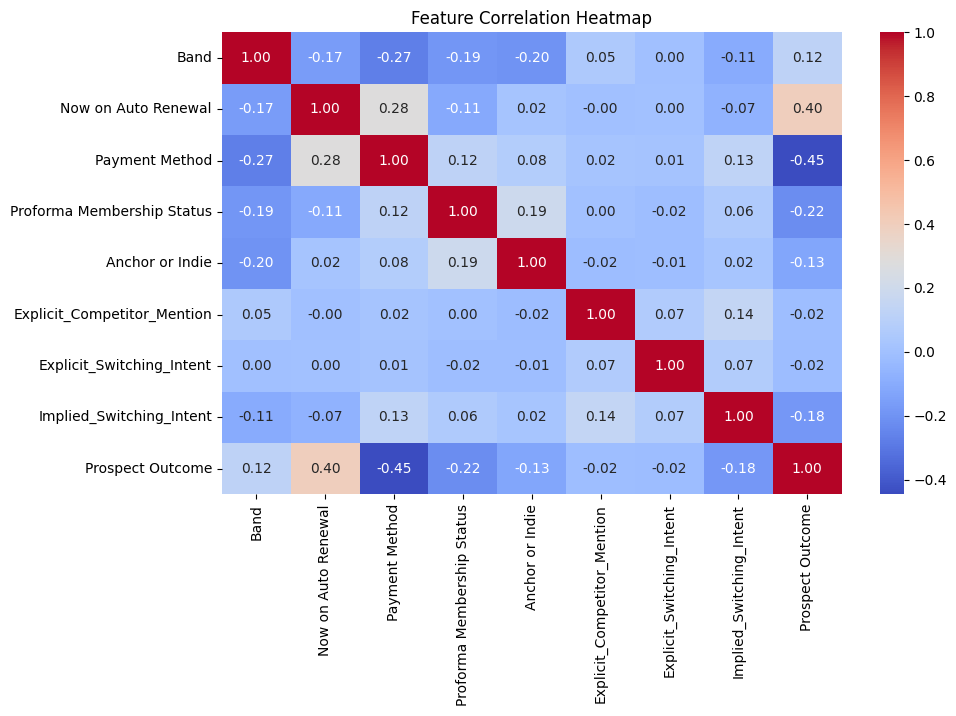

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
# Define X (features) and y (target)
X = df_selected.drop(columns=["Prospect Outcome"])
y = df_selected["Prospect Outcome"]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)

Training Set Shape: (2660, 8)
Validation Set Shape: (666, 8)


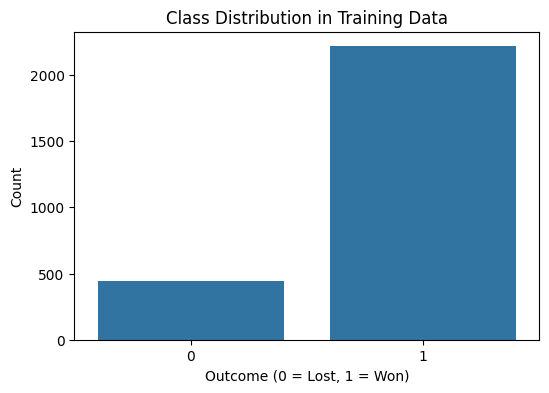

Won: 2215 (83.27%)
Lost: 445 (16.73%)


In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Data")
plt.xlabel("Outcome (0 = Lost, 1 = Won)")
plt.ylabel("Count")
plt.show()

# Print percentage distribution
won_count = y_train.sum()
lost_count = len(y_train) - won_count
total = len(y_train)

print(f"Won: {won_count} ({(won_count / total) * 100:.2f}%)")
print(f"Lost: {lost_count} ({(lost_count / total) * 100:.2f}%)")

New class distribution after SMOTE:
Prospect Outcome
0    2215
1    2215
Name: count, dtype: int64


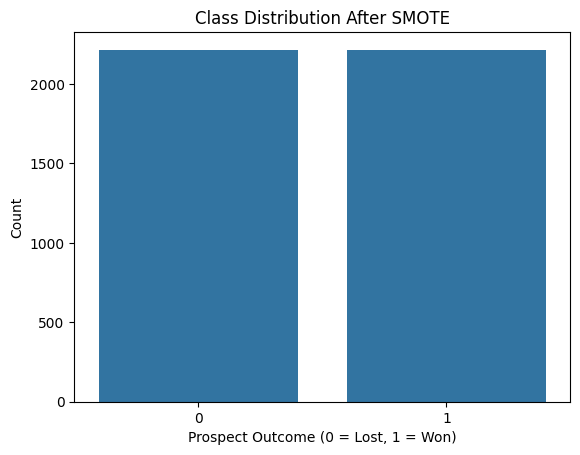

In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("New class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Ensure dataset is balanced
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Prospect Outcome (0 = Lost, 1 = Won)")
plt.ylabel("Count")
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_val_scaled = scaler.transform(X_val)  # Scale validation data


In [22]:

# Train the logistic regression model
model = LogisticRegression(class_weight="balanced", random_state=42)
model.fit(X_resampled_scaled, y_resampled)

# Predictions on validation set
y_pred = model.predict(X_val_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.972972972972973

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       111
           1       1.00      0.97      0.98       555

    accuracy                           0.97       666
   macro avg       0.93      0.98      0.95       666
weighted avg       0.98      0.97      0.97       666


Confusion Matrix:
 [[111   0]
 [ 18 537]]


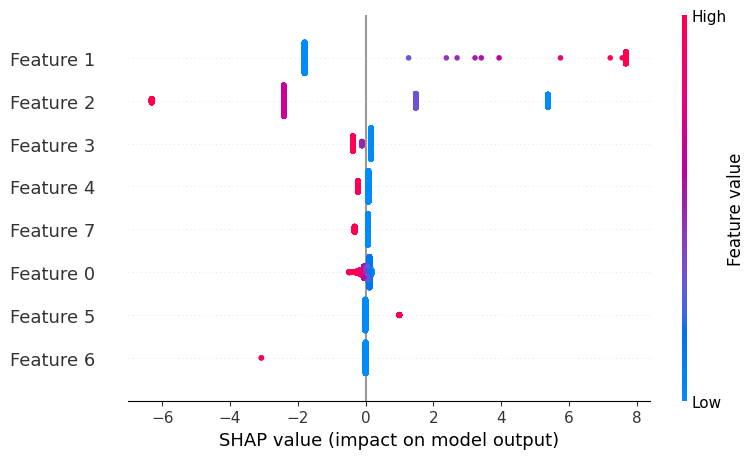

In [23]:

explainer = shap.Explainer(model, X_resampled_scaled)
shap_values = explainer(X_resampled_scaled)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_resampled)


In [34]:
  # Keep only features
X_test_open = df_test[selected_features]
X_test_open = X_test_open.drop(columns=["Prospect Outcome"])
# Preprocess "Open" data (apply same transformations)
for col in label_encoders:
    if col in X_test_open.columns:
        X_test_open[col] = label_encoders[col].transform(X_test_open[col])

X_test_open_scaled = scaler.transform(X_test_open)

# Predict if "Open" cases will be "Won" or "Lost"
y_test_open_pred = model.predict(X_test_open_scaled)

# Store results in DataFrame
open_predictions = pd.DataFrame({"ID": X_test_open.index, "Predicted Outcome": y_test_open_pred})
open_predictions["Predicted Outcome"] = open_predictions["Predicted Outcome"].map({0: "Lost", 1: "Won"})

# Display predictions
print(open_predictions.head(50))

# Save to CSV
open_predictions.to_csv("predicted_open_outcomes.csv", index=False)

       ID Predicted Outcome
0     708              Lost
1    2458              Lost
2    3902              Lost
3    3960              Lost
4    4766              Lost
5    4861               Won
6    4918              Lost
7    4992              Lost
8    5284              Lost
9    5355              Lost
10   5374              Lost
11   6324              Lost
12   6439              Lost
13   6477              Lost
14   7231              Lost
15   7333              Lost
16   7817              Lost
17   7994               Won
18   8350              Lost
19   8473              Lost
20   9064               Won
21   9442               Won
22   9632              Lost
23  10448              Lost
24  10681               Won
25  10705               Won
26  10717               Won
27  11116              Lost
28  12126              Lost
